In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import torch as th
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.autograd import Variable

In [3]:
def plot_classification(ax, x, y, colors, legend):
    color_set = set(colors)
    for color in color_set:
        x_curr = []
        y_curr = []
        for i, c in enumerate(colors):
            if c == color:
                x_curr.append(x[i])
                y_curr.append(y[i])
        ax.scatter(x_curr, y_curr, c=color,label=legend[color])

legend = {'red': 0, 'blue': 1}

def color_mapping(cl):
    colors = ['red', 'blue', 'green']
    return colors[cl]
color_mapper = np.vectorize(color_mapping)

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, n_inputs, n_classes=2, bias=True):
        super().__init__()
        self.weights = nn.Linear(n_inputs, n_classes, bias=bias)
        init.xavier_uniform(self.weights.weight)
        #self.act_fun = nn.Sigmoid()
    
    def forward(self, x):
        x = self.weights(x)
        #x = self.act_fun(x)
        return x
    
def class_probs_to_class(arr):
    return np.argmax(arr, axis=1)

In [5]:
xor_x = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_y = np.array([0, 1, 1, 0])

In [6]:
xor_colors = color_mapper(xor_y)

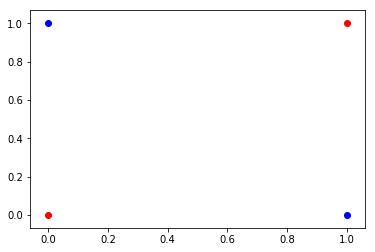

In [38]:
fig, ax = plt.subplots()
plot_classification(ax, xor_x[:,0], xor_x[:,1], xor_colors, legend)

In [58]:
clf = LogisticRegression(2)
epochs = 100
lr = 0.5

In [59]:
optimizer = optim.Adam(clf.parameters(),lr=lr)
criterion = nn.CrossEntropyLoss()

In [60]:
for it in range(epochs):
    inputs = Variable(th.FloatTensor(xor_x))
    labels = Variable(th.LongTensor(xor_y))
    
    optimizer.zero_grad()
    output = clf(inputs)
    loss = criterion(output, labels)
    print(f'Loss at iteration {it + 1} is {loss.data[0]}')
    loss.backward()
    optimizer.step()

Loss at iteration 1 is 0.7430129051208496
Loss at iteration 2 is 1.0231505632400513
Loss at iteration 3 is 0.7547588348388672
Loss at iteration 4 is 0.7483731508255005
Loss at iteration 5 is 0.8475409746170044
Loss at iteration 6 is 0.793520987033844
Loss at iteration 7 is 0.7056830525398254
Loss at iteration 8 is 0.7181946039199829
Loss at iteration 9 is 0.7769285440444946
Loss at iteration 10 is 0.7761093974113464
Loss at iteration 11 is 0.7271103858947754
Loss at iteration 12 is 0.6980844736099243
Loss at iteration 13 is 0.7191073298454285
Loss at iteration 14 is 0.7442410588264465
Loss at iteration 15 is 0.7338568568229675
Loss at iteration 16 is 0.704332709312439
Loss at iteration 17 is 0.6946121454238892
Loss at iteration 18 is 0.7117685079574585
Loss at iteration 19 is 0.7253385186195374
Loss at iteration 20 is 0.7165505886077881
Loss at iteration 21 is 0.6993238925933838
Loss at iteration 22 is 0.6963769793510437
Loss at iteration 23 is 0.7073916792869568
Loss at iteration 24 i

[[-0.08431352 -0.08619165]
 [-0.64577556 -0.64925641]
 [ 0.50523698  0.49933845]
 [-0.05622507 -0.0637263 ]]
[0 0 0 0]


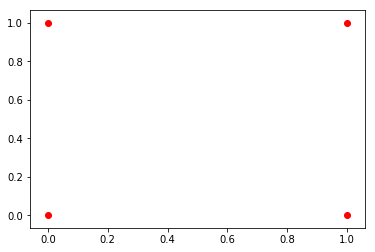

In [61]:
fig, ax = plt.subplots()
predicted_classes = class_probs_to_class(output.data.numpy())
print(output.data.numpy())
print(predicted_classes)
plot_classification(ax, xor_x[:,0], xor_x[:,1], color_mapper(predicted_classes), legend)

In [77]:
class XORNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2, 4, bias=True)
        self.t1 = nn.PReLU()
        self.lend = nn.Linear(4, 2, bias=True)
    
    def get_inter(self, x):
        x = self.l1(x)
        x = self.t1(x)
        return x
    
    def forward(self, x):
        x = self.get_inter(x)
        x = self.lend(x)
        return x
        
        

In [78]:
clf = XORNetwork()
epochs = 100
lr = 0.5

In [79]:
optimizer = optim.Adam(clf.parameters(),lr=lr)
criterion = nn.CrossEntropyLoss()

In [80]:
for it in range(epochs):
    inputs = Variable(th.FloatTensor(xor_x))
    labels = Variable(th.LongTensor(xor_y))
    
    optimizer.zero_grad()
    output = clf(inputs)
    loss = criterion(output, labels)
    print(f'Loss at iteration {it + 1} is {loss.data[0]}')
    loss.backward()
    optimizer.step()

Loss at iteration 1 is 0.7197037935256958
Loss at iteration 2 is 0.8461862802505493
Loss at iteration 3 is 0.9585092663764954
Loss at iteration 4 is 0.7246178984642029
Loss at iteration 5 is 0.7607365846633911
Loss at iteration 6 is 0.7457866072654724
Loss at iteration 7 is 0.7330963611602783
Loss at iteration 8 is 0.7060040235519409
Loss at iteration 9 is 0.7495607137680054
Loss at iteration 10 is 0.7413415908813477
Loss at iteration 11 is 0.7441181540489197
Loss at iteration 12 is 0.694357693195343
Loss at iteration 13 is 0.7085803747177124
Loss at iteration 14 is 0.6580329537391663
Loss at iteration 15 is 0.6233940124511719
Loss at iteration 16 is 0.5988852977752686
Loss at iteration 17 is 0.5376971960067749
Loss at iteration 18 is 0.4747830033302307
Loss at iteration 19 is 0.405376672744751
Loss at iteration 20 is 0.2738063931465149
Loss at iteration 21 is 0.1449320912361145
Loss at iteration 22 is 0.05140278488397598
Loss at iteration 23 is 0.022396648302674294
Loss at iteration 2

[[  9.76584244  -8.13430405]
 [-10.51179886  13.19651031]
 [-18.42449379  24.77241516]
 [ 14.08810711 -11.81001663]]
[0 1 1 0]


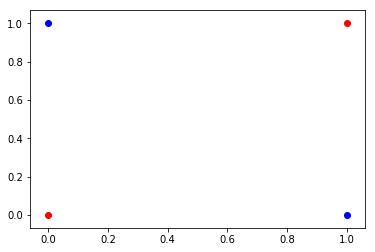

In [81]:
fig, ax = plt.subplots()
predicted_classes = class_probs_to_class(output.data.numpy())
print(output.data.numpy())
print(predicted_classes)
plot_classification(ax, xor_x[:,0], xor_x[:,1], color_mapper(predicted_classes), legend)

In [82]:
intermediate = clf.get_inter(inputs)

In [83]:
from sklearn.manifold import TSNE
intermediate = intermediate.data.numpy()
tsne = TSNE(n_components=2)
projection = tsne.fit_transform(intermediate)


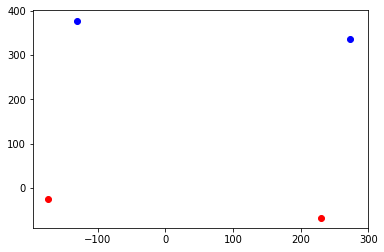

In [84]:
fig, ax = plt.subplots()
plot_classification(ax, projection[:,0], projection[:,1], color_mapper(predicted_classes), legend)